# Prédiction du locuteur : discours de Chirac et Mitterand

 Le but de ce projet est de comparer les performances avec différents pré-traitements, et d'appliquer les traitements optimaux sur les données de test. Pour entraîner nos modèles, nous disposons d'échantillons étiquettés 'M' pour Mitterand et 'C' pour Chirac.

## Lecture et importation des données

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import codecs
import re
import os.path

In [3]:
# Chargement des données:
def load_pres(fname):
    alltxts = []
    alllabs = []
    s=codecs.open(fname, 'r','utf-8') # pour régler le codage
    while True:
        txt = s.readline()
        if(len(txt))<5:
            break
        lab = re.sub(r"<[0-9]*:[0-9]*:(.)>.*","\\1",txt)
        txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt)
        if lab.count('M') >0: #miterrand = -1
            alllabs.append(-1)
        else: 
            alllabs.append(1)
        alltxts.append(txt)
    return alltxts,alllabs

In [4]:
fname = "./ressources/AFDpresidentutf8/corpus.tache1.learn.utf8"
alltxts,alllabs = load_pres(fname)


In [5]:
fname_test = "./ressources/AFDpresidentutf8/corpus.tache1.test.utf8"
alltxts_test = []
s=codecs.open(fname, 'r','utf-8') # pour régler le codage
while True:
    txt = s.readline()
    if(len(txt))<5:
        break
    txt = re.sub(r"<[0-9]*:[0-9]*:.>(.*)","\\1",txt)
    alltxts_test.append(txt)

In [6]:
print(len(alltxts),len(alllabs))
print(alltxts[0])
print(alllabs[0])
print(alltxts[-1])
print(alllabs[12])


57413 57413
 Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.

1
 Je compte sur vous.

-1


## Prétraitement
Nous allons comparer les performances de 5 types de prétraitements.\
- Prétraitement par défaut de CountVectorizer
- Snowball Stemmer
- Suppression des stop-words
- Bigram
- Trigram
- Réduction de la taille du dictionnaire 


a. Prétraitement par défaut de CountVectorizer

Le prétraitement par défaut du module CountVectorizer de sci-kit learn correspond aux paramètres suivants:\
**input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\b\w\w+\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>**

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(alltxts)
print(vectorizer.get_feature_names_out())

dic_size_avant_reduction = len(vectorizer.vocabulary_)
print("Taille du dictionnaire:", dic_size_avant_reduction)

['000' '10' '100' ... 'ôtent' 'ôter' 'ôté']
Taille du dictionnaire: 28524



b. Stemming

In [8]:
from nltk.stem import SnowballStemmer

In [9]:
snowball_stemmer = SnowballStemmer('french')
words = [word for word in alltxts]
stemmed_alltxts = [snowball_stemmer.stem(word) for word in alltxts]

Vérifions que le Stemming a bien fonctionné en comparant la première phrase avant et après le Stemming.

In [10]:
print("Phrase originale:",words[0])
print("Phrase post stemming:",stemmed_alltxts[0])

Phrase originale:  Quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.

Phrase post stemming:  quand je dis chers amis, il ne s'agit pas là d'une formule diplomatique, mais de l'expression de ce que je ressens.



In [11]:
X_stemmed = vectorizer.fit_transform(stemmed_alltxts)
print(vectorizer.get_feature_names_out())

['000' '10' '100' ... 'ôtent' 'ôter' 'ôté']


c. Suppression des stopwords

[('de', 68579), ('', 57413), ('la', 39694), ('et', 34709), ('à', 26075), ('les', 24312), ('le', 24256), ('des', 21492), ('que', 15737), ('qui', 14808), ('en', 14197), ('pour', 11012), ('dans', 10957), ('du', 10638), ('un', 9237), ('une', 8900), ('nous', 7089), ('plus', 7078), ('au', 7067), ('est', 6981)]


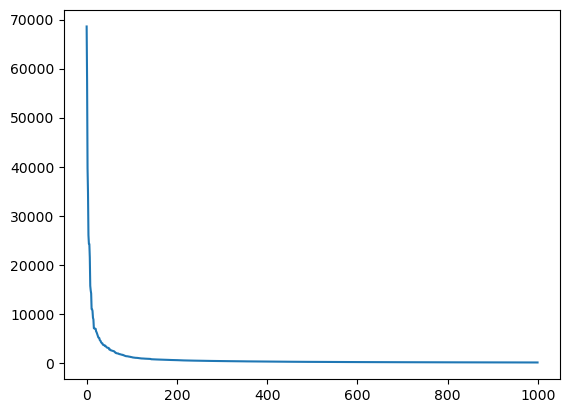

In [12]:
#Essayons de plot les 1000 mots les plus fréquents

import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

wc = Counter()
for text in alltxts:
    wc.update(text.split(" "))
    
freq = [f for w,f in wc.most_common(1000)]

plt.plot(freq[:1000])
print(wc.most_common(20))

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

#Téléchargement d'une liste de stopwords 
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = set(stopwords.words('french'))
stops = list(stops)
print(stops)

vectorizer = CountVectorizer(stop_words=stops)
X_stops = vectorizer.fit_transform(alltxts)

[nltk_data] Downloading package stopwords to /Users/nada/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['soyons', 'on', 'ayez', 'les', 'suis', 'sa', 'aviez', 'eûmes', 'ayante', 'serez', 'fut', 'fussiez', 'serai', 'fusse', 'es', 'seront', 'ses', 'votre', 'd', 'aurions', 'tes', 'étantes', 'eux', 'eussent', 'me', 'étaient', 'aurais', 'avions', 'il', 'aurait', 'sont', 'en', 'dans', 'même', 'mon', 'aux', 'furent', 'leur', 'ou', 'ne', 'avais', 'eues', 'serait', 'ce', 'eusse', 'y', 'aient', 'des', 'fût', 'j', 'aies', 'auraient', 'la', 'vos', 'auriez', 's', 'l', 'fussent', 'aie', 'eussions', 'étants', 'mes', 'étant', 'avec', 'sois', 'ces', 'serions', 'seriez', 'serons', 'pas', 'sur', 'une', 'vous', 'soyez', 'lui', 'ayons', 'elle', 'eussiez', 'eurent', 'soient', 'm', 'étiez', 'ayants', 'sommes', 'tu', 'étée', 'moi', 'ils', 'été', 'soit', 'toi', 'du', 'avait', 'fûmes', 'eu', 'aurai', 'aurez', 'se', 'le', 'à', 'auront', 'fûtes', 'aurons', 'sera', 'seras', 'avons', 'pour', 'son', 'est', 'ont', 'et', 'as', 'étions', 'serais', 'ta', 'au', 'êtes', 'eue', 'aura', 'je', 'eûtes', 'eus', 'qui', 'ma', 'aya

d. Bigram\
Les phrases sont coupées en séquences de 2 mots. 

In [14]:
vectorizer = CountVectorizer(ngram_range=(2,2),analyzer='word')
X_bigram = vectorizer.fit_transform(alltxts)


e. Trigram\
Les phrases sont coupées en séquences de 3 mots. 

In [15]:
vectorizer = CountVectorizer(ngram_range=(3,3),analyzer='word')
X_trigram = vectorizer.fit_transform(alltxts)

e. Réduire la taille du dictionnaire

In [16]:
vectorizer = CountVectorizer(max_df=100000,min_df=5,max_features=25000)
X_reduit = vectorizer.fit_transform(alltxts)

dic_size = len(vectorizer.vocabulary_)
print("Taille du dictionnaire avant:", dic_size_avant_reduction)
print("Taille du dictionnaire après:", dic_size)

Taille du dictionnaire avant: 28524
Taille du dictionnaire après: 10478


## Étape 3 : les Classifieurs

Nous avons choisi de comparer les performances de 4 modèles : Naïve Bayes, Régression Logistique, SVM linéaire, et Random Forest. Pour chaque type de prétraitement, on effectue une validation croisée et on stocke le score R2 dans un dictionnaire. À l'issue de cette étape, nous allons pouvoir appliquer les traitements optimaux sur les données de test.

In [17]:
import numpy as np
import sklearn.naive_bayes as nb
from sklearn import svm
from sklearn import linear_model as lin
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

***Prétraitement par défaut***

In [18]:
accuracy = {}

#Naïve Bayes
nb_clf = nb.MultinomialNB()
score= cross_val_score(nb_clf, X, alllabs)
accuracy["Naïve Bayes"]=score.mean()

#Logistic Regression
lr_clf = lin.LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1)
score= cross_val_score(lr_clf, X, alllabs)
accuracy["Logistic Regression"]=score.mean()

#Linear SVM
svm_clf = svm.LinearSVC(random_state=0, tol=1e-5)
score= cross_val_score(svm_clf, X, alllabs)
accuracy["SVM"]=score.mean()

#Random Forest
rf_clf = RandomForestClassifier(random_state=0, max_depth=5)
score= cross_val_score(rf_clf, X, alllabs)
accuracy["Random Forest"]=score.mean()


/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

***Stemming***

In [19]:
accuracy_stemming = {}

#Naïve Bayes
nb_clf_s = nb.MultinomialNB()
score= cross_val_score(nb_clf_s, X_stemmed, alllabs)
accuracy_stemming["Naïve Bayes"]=score.mean()

#Logistic Regression
lr_clf_s = lin.LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1)
score= cross_val_score(lr_clf_s, X_stemmed, alllabs)
accuracy_stemming["Logistic Regression"]=score.mean()

#Linear SVM
svm_clf_s = svm.LinearSVC(random_state=0, tol=1e-5)
score= cross_val_score(svm_clf_s, X_stemmed, alllabs)
accuracy_stemming["SVM"]=score.mean()

#Random Forest
rf_clf_s = RandomForestClassifier(random_state=0, max_depth=5)
score= cross_val_score(rf_clf_s, X_stemmed, alllabs)
accuracy_stemming["Random Forest"]=score.mean()

/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: 

***Suppression des stopwords***

In [20]:
accuracy_without_stop_words = {}

#Naïve Bayes
nb_clf_ws = nb.MultinomialNB()
score= cross_val_score(nb_clf_ws, X_stops, alllabs)
accuracy_without_stop_words["Naïve Bayes"]=score.mean()

#Logistic Regression
lr_clf_ws = lin.LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1)
score= cross_val_score(lr_clf_ws, X_stops, alllabs)
accuracy_without_stop_words["Logistic Regression"]=score.mean()

#Linear SVM
svm_clf_ws = svm.LinearSVC(random_state=0, tol=1e-5)
score= cross_val_score(svm_clf_ws, X_stops, alllabs)
accuracy_without_stop_words["SVM"]=score.mean()

#Random Forest
rf_clf_ws = RandomForestClassifier(random_state=0, max_depth=5)
score= cross_val_score(rf_clf_ws, X_stops, alllabs)
accuracy_without_stop_words["Random Forest"]=score.mean()


/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppres

***Bigram***

In [21]:
accuracy_bigram={}

#Naïve Bayes
nb_clf_bi = nb.MultinomialNB()
score= cross_val_score(nb_clf_bi, X_bigram, alllabs)
accuracy_bigram["Naïve Bayes"]=score.mean()
print(score.mean())

#Logistic Regression
lr_clf_bi = lin.LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1)
score= cross_val_score(lr_clf_bi, X_bigram, alllabs)
accuracy_bigram["Logistic Regression"]=score.mean()
print(score.mean())

#Linear SVM
svm_clf_bi = svm.LinearSVC(random_state=0, tol=1e-5)
score= cross_val_score(svm_clf_bi, X_bigram, alllabs)
accuracy_bigram["SVM"]=score.mean()
print(score.mean())

#Random Forest
rf_clf_bi = RandomForestClassifier(random_state=0, max_depth=5)
score= cross_val_score(rf_clf_bi, X_bigram, alllabs)
accuracy_bigram["Random Forest"]=score.mean()

0.8661278853589721
0.8977583184053893


/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppres

0.8913486524000256


***Trigram***

In [22]:
accuracy_trigram={}

#Naïve Bayes
nb_clf_tri = nb.MultinomialNB()
score= cross_val_score(nb_clf_tri, X_trigram, alllabs)
accuracy_trigram["Naïve Bayes"]=score.mean()
print(score.mean())

#Logistic Regression
lr_clf_tri = lin.LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1)
score= cross_val_score(lr_clf_tri, X_trigram, alllabs)
accuracy_trigram["Logistic Regression"]=score.mean()
print(score.mean())

#Linear SVM
svm_clf_tri = svm.LinearSVC(random_state=0, tol=1e-5)
score= cross_val_score(svm_clf_tri, X_trigram, alllabs)
accuracy_trigram["SVM"]=score.mean()
print(score.mean())

#Random Forest
rf_clf_tri = RandomForestClassifier(random_state=0, max_depth=5)
score= cross_val_score(rf_clf_tri, X_trigram, alllabs)
accuracy_trigram["Random Forest"]=score.mean()

0.6749517591517602
0.8804626373532527


/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppres

0.8830055632476735


***Réduction de la taille du vocabulaire***

In [23]:
accuracy_reduit={}

#Naïve Bayes
nb_clf_r = nb.MultinomialNB()
score= cross_val_score(nb_clf_r, X_reduit, alllabs)
accuracy_reduit["Naïve Bayes"]=score.mean()
print(score.mean())

#Logistic Regression
lr_clf_r = lin.LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1)
score= cross_val_score(lr_clf_r, X_reduit, alllabs)
accuracy_reduit["Logistic Regression"]=score.mean()
print(score.mean())

#Linear SVM
svm_clf_r = svm.LinearSVC(random_state=0, tol=1e-5)
score= cross_val_score(svm_clf_r, X_reduit, alllabs)
accuracy_reduit["SVM"]=score.mean()
print(score.mean())

#Random Forest
rf_clf_r = RandomForestClassifier(random_state=0, max_depth=5)
score= cross_val_score(rf_clf_r, X_reduit, alllabs)
accuracy_reduit["Random Forest"]=score.mean()


0.8741050313723081
0.8971660233769836


/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/nada/miniconda3/envs/filrouge/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: 

0.8753765307251303


Pour chaque type de prétraitement, on obtient un dictionnaire contenant le score R2 pour chaque modèle. 

In [24]:
#Fonction pour trier le dictionnaire
def sort_dict(X):
    return dict(sorted(X.items(), key=lambda item: item[1]))

print("Prétraitement par défaut de CountVectorizer: \n",sort_dict(accuracy))
print("Stemming: \n" ,sort_dict(accuracy_stemming))
print("Suppression des stop-words: \n",sort_dict(accuracy_without_stop_words))
print("Bigram: \n",sort_dict(accuracy_bigram))
print("Trigram: \n",sort_dict(accuracy_trigram))
print("Réduction de la taille du dictionnaire: \n",sort_dict(accuracy_reduit))


Prétraitement par défaut de CountVectorizer: 
 {'Random Forest': 0.8689669602844965, 'SVM': 0.8786336300506965, 'Naïve Bayes': 0.8790516741704447, 'Logistic Regression': 0.8981762563421041}
Stemming: 
 {'Random Forest': 0.8689669602844965, 'SVM': 0.8785639572948222, 'Naïve Bayes': 0.8789123286586961, 'Logistic Regression': 0.8970440933996278}
Suppression des stop-words: 
 {'Random Forest': 0.8689669602844965, 'SVM': 0.8755507831506881, 'Naïve Bayes': 0.8772926020475456, 'Logistic Regression': 0.8935258187003885}
Bigram: 
 {'Naïve Bayes': 0.8661278853589721, 'Random Forest': 0.8689669602844965, 'SVM': 0.8913486524000256, 'Logistic Regression': 0.8977583184053893}
Trigram: 
 {'Naïve Bayes': 0.6749517591517602, 'Random Forest': 0.8689669602844965, 'Logistic Regression': 0.8804626373532527, 'SVM': 0.8830055632476735}
Réduction de la taille du dictionnaire: 
 {'Random Forest': 0.8689669602844965, 'Naïve Bayes': 0.8741050313723081, 'SVM': 0.8753765307251303, 'Logistic Regression': 0.89716602

La meilleure performance est atteinte par le modèle **Régression Logistique, avec le prétraitement par défaut de CountVectorizer**. \
Il est intéressant de visualiser les performances de chaque type de prétraitement, et de chaque modèle. 

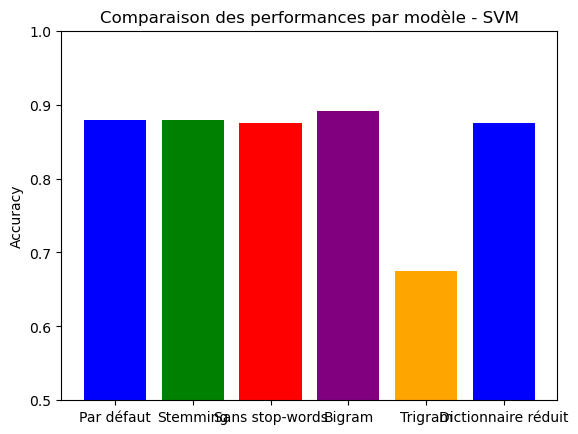

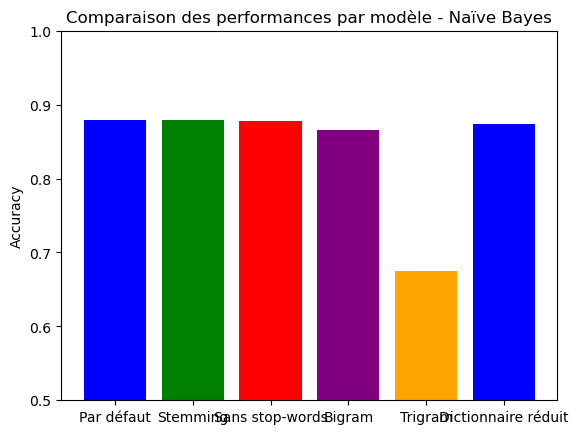

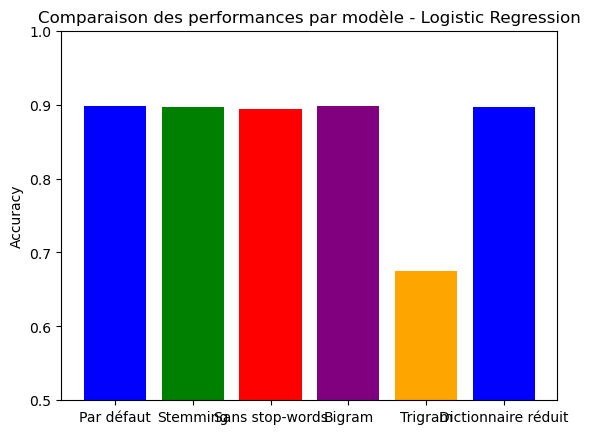

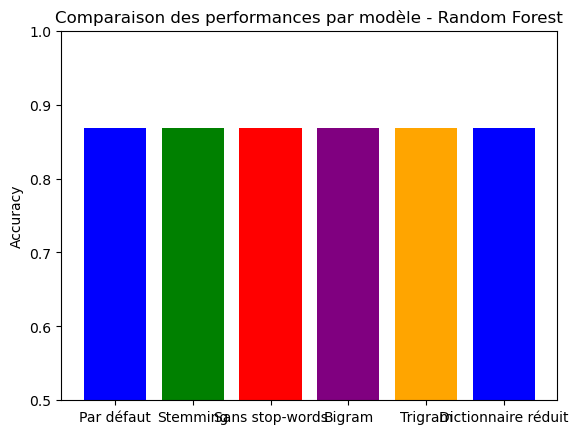

In [25]:
# Comparaison des performances par modèle
pretraitements=['Par défaut','Stemming','Sans stop-words','Bigram','Trigram','Dictionnaire réduit']

#SVM
accuracies=[accuracy["SVM"],accuracy_stemming["SVM"],accuracy_without_stop_words['SVM'], accuracy_bigram['SVM'],accuracy_trigram['Naïve Bayes'],accuracy_reduit['SVM']]
plt.bar(pretraitements, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylim(0.5, 1)  
plt.ylabel('Accuracy')
plt.title('Comparaison des performances par modèle - SVM')
plt.show()


#Naïve Bayes
accuracies=[accuracy["Naïve Bayes"],accuracy_stemming["Naïve Bayes"],accuracy_without_stop_words['Naïve Bayes'], accuracy_bigram['Naïve Bayes'],accuracy_trigram['Naïve Bayes'],accuracy_reduit['Naïve Bayes']]
plt.bar(pretraitements, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylim(0.5, 1)  
plt.ylabel('Accuracy')
plt.title('Comparaison des performances par modèle - Naïve Bayes')
plt.show()


#Logistic Regression
accuracies=[accuracy['Logistic Regression'],accuracy_stemming['Logistic Regression'],accuracy_without_stop_words['Logistic Regression'], accuracy_bigram['Logistic Regression'],accuracy_trigram['Naïve Bayes'],accuracy_reduit['Logistic Regression']]
plt.bar(pretraitements, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylim(0.5, 1)  
plt.ylabel('Accuracy')
plt.title('Comparaison des performances par modèle - Logistic Regression')
plt.show()


#Random Forest
accuracies=[accuracy["Random Forest"],accuracy_stemming["Random Forest"],accuracy_without_stop_words["Random Forest"], accuracy_bigram["Random Forest"],accuracy_trigram["Random Forest"],accuracy_reduit["Random Forest"]]
plt.bar(pretraitements, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylim(0.5, 1)  
plt.ylabel('Accuracy')
plt.title('Comparaison des performances par modèle - Random Forest')
plt.show()


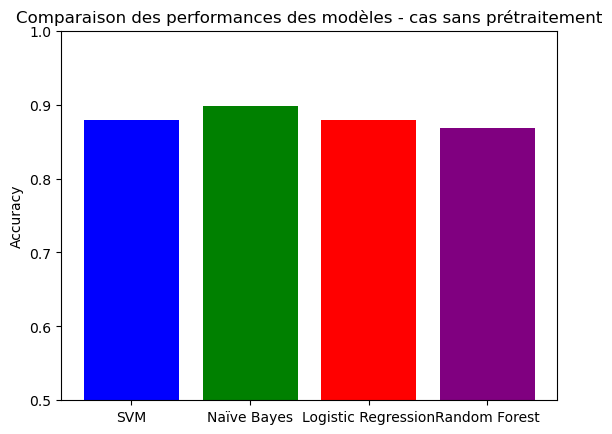

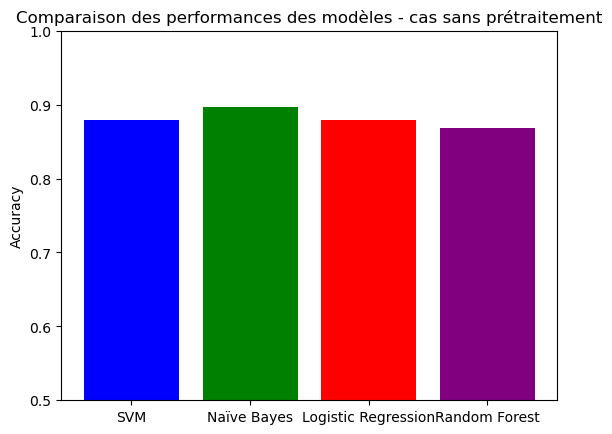

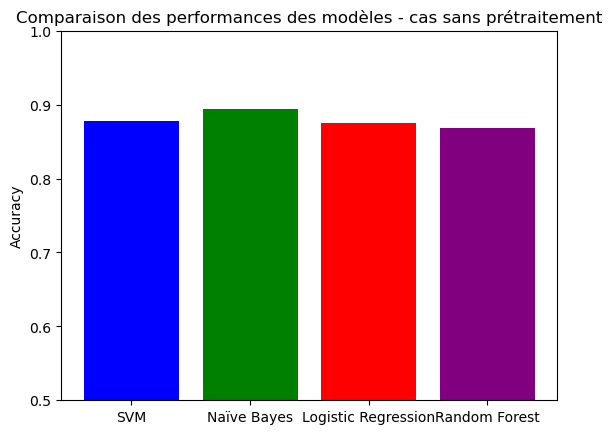

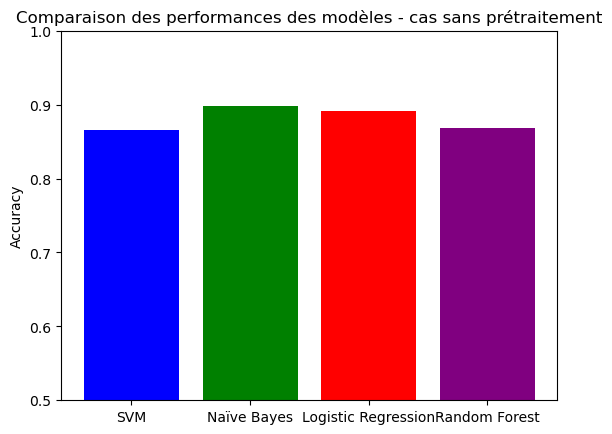

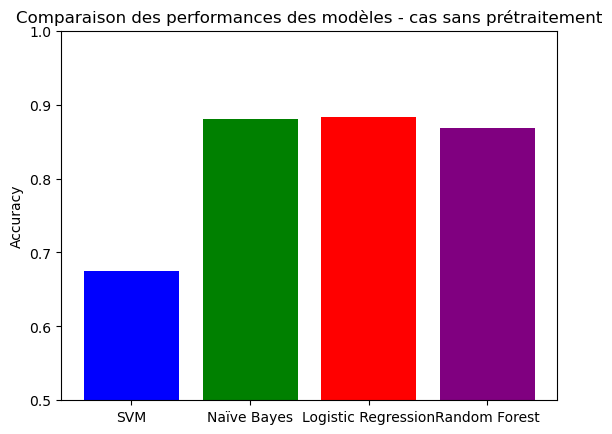

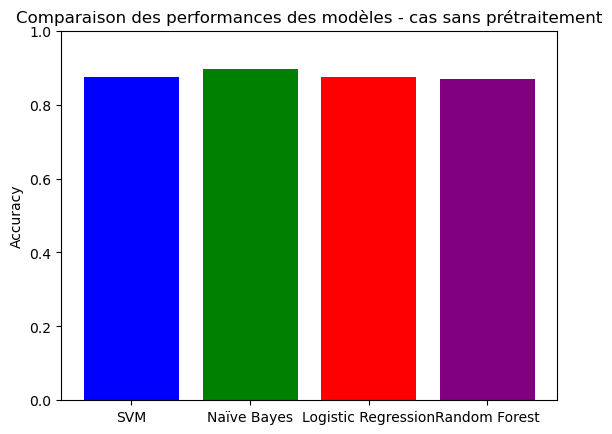

In [26]:
# Comparaison des performances par type de prétraitement
models=['SVM','Naïve Bayes','Logistic Regression','Random Forest']

#Sans prétraitement
accuracies=[float(valeur) for valeur in accuracy.values()]
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylim(0.5, 1)  
plt.ylabel('Accuracy')
plt.title('Comparaison des performances des modèles - cas sans prétraitement')
plt.show()


#Stemming
accuracies=[float(valeur) for valeur in accuracy_stemming.values()]
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylim(0.5, 1)  
plt.ylabel('Accuracy')
plt.title('Comparaison des performances des modèles - cas sans prétraitement')
plt.show()

#En retirant les stop words
accuracies=[float(valeur) for valeur in accuracy_without_stop_words.values()]
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylim(0.5, 1)  
plt.ylabel('Accuracy')
plt.title('Comparaison des performances des modèles - cas sans prétraitement')
plt.show()

#Bigram
accuracies=[float(valeur) for valeur in accuracy_bigram.values()]
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylim(0.5, 1)  
plt.ylabel('Accuracy')
plt.title('Comparaison des performances des modèles - cas sans prétraitement')
plt.show()

#Trigram
accuracies=[float(valeur) for valeur in accuracy_trigram.values()]
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylim(0.5, 1) 
plt.ylabel('Accuracy')
plt.title('Comparaison des performances des modèles - cas sans prétraitement')
plt.show()

#Après réduction de la taille du dictionnaire
accuracies=[float(valeur) for valeur in accuracy_reduit.values()]
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylim(0, 1) 
plt.ylabel('Accuracy')
plt.title('Comparaison des performances des modèles - cas sans prétraitement')
plt.show()

## Application des traitements optimaux sur les données de test et chargement dans un fichier .txt

In [27]:
#Prétraitement
pretraitement_opti = CountVectorizer()
X_train = pretraitement_opti.fit_transform(alltxts)
X_test = pretraitement_opti.fit_transform(alltxts_test)

#Entraîntement du modèle
modele_opti = lin.LogisticRegression(random_state=0, solver='lbfgs',n_jobs=-1)
modele_opti.fit(X_train, alllabs)

#Prédiction
y_test = modele_opti.predict(X_test)

#remplacer -1 par mitterand et 1 par chirac
y_test = np.where(y_test == 1, 'C', np.where(y_test == -1, 'M', y_test))

#Sauvegarde dans un fichier txt 
name = "prediction.txt"
np.savetxt(name, y_test,fmt='%s')